# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_data_btc_content = response_data_btc.content
data_btc = response_data_btc.json()
btc_price = data_btc["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
response_data_eth = requests.get(eth_url)
response_data_eth_content = response_data_eth.content
data_eth = response_data_eth.json()
eth_price = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $54365.14
The current value of your 5.3 ETH is $15872.47


In [8]:
print(json.dumps(data_btc, indent = 4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18732243,
            "total_supply": 18732243,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 37423.0,
                    "volume_24h": 39378063832,
                    "market_cap": 700446062168,
                    "percentage_change_1h": -0.538838475838864,
                    "percentage_change_24h": -0.910281305974266,
                    "percentage_change_7d": -4.41320444824248,
                    "percent_change_1h": -0.538838475838864,
                    "percent_change_24h": -0.910281305974266,
                    "percent_change_7d": -4.41320444824248
                },
                "CAD": {
                    "price": 45304.2838,
                    "volume_24h": 47671084075.0192,
               

In [9]:
print(json.dumps(data_eth, indent = 4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 116246789,
            "total_supply": 116246789,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2473.82,
                    "volume_24h": 29634299315,
                    "market_cap": 287250950899,
                    "percentage_change_1h": -0.335926842081438,
                    "percentage_change_24h": -3.45520748379537,
                    "percentage_change_7d": -13.4506768894475,
                    "percent_change_1h": -0.335926842081438,
                    "percent_change_24h": -3.45520748379537,
                    "percent_change_7d": -13.4506768894475
                },
                "CAD": {
                    "price": 2994.806492,
                    "volume_24h": 35875282750.739,
              

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-09", tz= "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2021-06-09 00:00:00-04:00  115.43  115.43  114.97  115.05  3418086  423.18   

                                                             
                             high     low   close    volume  
2021-06-09 00:00:00-04:00  423.26  421.41  421.62  38368598

In [13]:
# Pick AGG and SPY close prices
df_closing_prices_AGG = float(df_portfolio["AGG"]["close"])
df_closing_prices_SPY = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${df_closing_prices_AGG}")
print(f"Current SPY closing price: ${df_closing_prices_SPY}")

Current AGG closing price: $115.05
Current SPY closing price: $421.62


In [14]:
# Compute the current value of shares
my_spy_value = df_closing_prices_SPY * my_spy
my_agg_value = df_closing_prices_AGG * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21081.00
The current value of your 200 AGG shares is $23010.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
stock_value = my_spy_value + my_agg_value
crypto_value = my_btc_value + my_eth_value

financial_assets = [crypto_value, stock_value]

# Create savings DataFrame
df_savings = pd.DataFrame(financial_assets)
df_savings_1 = df_savings.rename(columns={ 0 : "amount"}, index={0: "crypto", 1: "stock"}) 

# Display savings DataFrame
df_savings_1                                          

,amount
crypto,70237.614968
stock,44091.000000


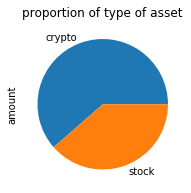

In [23]:
# Plot savings pie chart
df_savings_1["amount"].plot.pie(y='amount', figsize =(3,3), title ="proportion of type of asset" )

In [33]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_total = crypto_value + stock_value

# Validate saving health
if savings_total > emergency_fund:
    print("Congratulations! You have enough money in your fund")
elif savings_total == emergency_fund:
    print("Congratulations! You've reached your financial goal")
elif savings_total < emergency_fund:
    print(f"Your current goal is just {(emergency_fund - savings_total)} away")

Congratulations! You have enough money in your fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [46]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date_1 = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date_1 = pd.Timestamp('2019-05-01', tz='America/New_York').isoformat()

start_date_2 = pd.Timestamp('2019-05-02', tz='America/New_York').isoformat()
end_date_2 = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [54]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)# YOUR CODE HERE!
df_1 = api.get_barset(
    tickers,
    timeframe,
    start = start_date_1,
    end = end_date_1,
    limit = 1000
).df


df_2 = api.get_barset(
    tickers,
    timeframe,
    start = start_date_2,
    end = end_date_2,
    limit = 1000
).df

df_stock_data = pd.concat([df_1, df_2])

# Display sample data
df_stock_data.head()


AGG                                          \
                             open      high       low    close     volume   
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773.0   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893.0   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710.0   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143.0   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464.0   

                              SPY                                    
                             open    high     low   close    volume  
2016-05-02 00:00:00-04:00  206.92  208.18  206.41  207.97  52152807  
2016-05-03 00:00:00-04:00  206.52  206.80  205.28  206.15  79397652  
2016-05-04 00:00:00-04:00  204.99  205.85  204.42  204.99  73747383  
2016-05-05 00:00:00-04:00  205.56  205.98  204.47  204.98  58322810  
2016-05-06 00:00:00-04:00  204.06  205.77  203.88  205.70  69458860

In [56]:
df_stock_data.shape

(1259, 10)

In [65]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation = MCSimulation(
                            df_stock_data,
                            weights = [0.4, 0.6],
                            num_simulation = 500,
                            num_trading_days = 252*30)

mc_simulation.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773.0   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893.0   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710.0   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143.0   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-05-02 00:00:00-04:00          NaN  206.92  208.18  206.41  207.97   
2016-05-03 00:00:00-04:00     0.002034  206.52  206.80  205.28  206.15   
2016-05-04 00:00:00-04:00     0.000541  204.99  205.85  204.42  204.99   
2016-05-05 00:00:00-04:00     0.002165  205.56  205.98  204.47  204.98   
2016-05-06 00:00:00-04:00    -0.001080  204.06  205.77  203.88  205.70   

                                                  
                             volume daily_return  
2016-05-02 00:00:00-04:00  52152807          NaN  
2016-05-03 00:00:00-04:00  79397652    -0.008751  
2016-05-04 00:00:00-04:00  73747383    -0.005627  
2016-05-05 00:00:00-04:00  58322810    -0.000049  
2016-05-06 00:00:00-04:00  69458860     0.003513

In [66]:
mc_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003827,1.004913,1.004965,1.000601,1.011194,0.991888,0.992093,1.005449,0.996602,0.985062,...,1.002265,0.987202,1.012038,0.997489,1.004062,0.996826,0.988165,1.004204,1.015198,0.998549
2,0.998844,1.009138,1.008987,1.003762,1.006686,1.002566,0.985875,1.013555,0.998762,0.980783,...,0.997609,0.987800,1.022389,0.996564,1.007485,0.998935,0.997983,0.991236,1.015295,1.004471
3,0.997539,1.013069,1.011741,1.005482,1.006820,1.016354,0.982378,1.012777,1.003486,0.979669,...,0.994691,0.986555,1.033294,0.995975,1.006507,0.992099,1.000409,0.992683,1.012684,0.999585
4,1.013241,1.010396,1.019217,1.003318,0.988794,1.015007,0.985820,0.998419,1.002537,0.974569,...,0.998350,0.994477,1.028863,0.984297,1.008346,0.998028,1.009495,0.979565,1.007856,0.999492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.389359,3.146064,10.745221,6.716845,21.918186,13.494094,21.523905,46.501654,29.636470,14.772766,...,4.373662,42.938450,17.165727,7.221826,15.468557,32.333434,5.506735,17.154905,16.306929,9.444302
7557,16.449495,3.125059,10.712895,6.778928,22.229504,13.377686,21.648478,46.012007,29.713722,14.810516,...,4.351903,43.177660,17.115869,7.195644,15.546802,32.443586,5.483984,17.059376,16.298849,9.433199
7558,16.259425,3.111998,10.773775,6.779911,22.684437,13.489121,21.597307,46.301589,29.568050,14.660318,...,4.358913,43.176328,16.766978,7.152947,15.491685,32.296653,5.473773,16.884535,16.028894,9.383125
7559,16.117605,3.108188,10.806731,6.858183,22.789059,13.402191,21.438750,46.084746,29.897720,14.795424,...,4.344028,43.090775,16.634849,7.188122,15.374821,32.207922,5.468555,16.810815,15.941335,9.362781


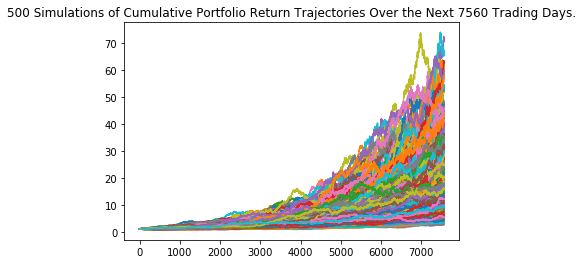

In [67]:
# Plot simulation outcomes
line_plot = mc_simulation.plot_simulation()

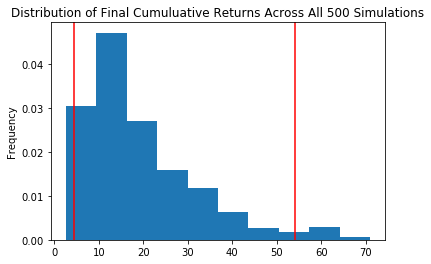

In [68]:
# Plot probability distribution and confidence intervals
dist_plot = mc_simulation.plot_distribution()

### Retirement Analysis

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_table = mc_simulation.summarize_cumulative_return()

# Print summary statistics
print(summary_table)

count           500.000000
mean             19.368908
std              12.598298
min               2.588671
25%              10.284164
50%              15.860103
75%              25.520838
max              71.012802
95% CI Lower      4.401950
95% CI Upper     54.208984
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [71]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = summary_table[8] * initial_investment
ci_upper = summary_table[9] * initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $88039.00793737941 and $1084179.6897963213


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [81]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = summary_table[8] * initial_investment_2
ci_upper_2 = summary_table[9] * initial_investment_2

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $132058.51190606912 and $1626269.5346944819


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")